<a href="https://colab.research.google.com/github/thaithinhhl/Sentiment_Analysis_Project/blob/main/Sentiment_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project tập trung phân tích cảm xúc khách hàng

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd
df =  pd.read_csv('/content/drive/MyDrive/IMDB-Dataset.csv')
df = df.drop_duplicates()
df = df.dropna() ## loại bỏ row trung thong tin
df[:10]


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
!pip install contractions


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.4 MB/s eta 0:00:00


## Làm sạch Data ##

In [5]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from bs4 import BeautifulSoup
import contractions

# Tải các gói cần thiết
nltk.download('stopwords')
nltk.download('wordnet')

# Khởi tạo các đối tượng cần thiết
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()  # Thêm stemming

# Hàm mở rộng các từ viết tắt
def expand_contractions(text):
    return contractions.fix(text)

# Hàm tiền xử lý văn bản với lemmatization và stemming
def preprocess_text(text):
    # Loại bỏ các thẻ HTML
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()

    # Mở rộng từ viết tắt
    text = expand_contractions(text)

    # Loại bỏ các emoji và biểu tượng
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"  # other symbols
        u"\U000024C2-\U0001F251"  # enclosed characters
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Thêm khoảng trắng sau dấu chấm
    text = re.sub(r'\.(?=\S)', '. ', text)

    # Loại bỏ URL
    text = re.sub(r'http\S+', '', text)

    # Loại bỏ dấu câu và chuyển thành chữ thường
    text = "".join([word.lower() for word in text if word not in string.punctuation])

    # Lemmatize, stemming và loại bỏ stopwords
    text = " ".join([
        stemmer.stem(lemmatizer.lemmatize(word))  # Thực hiện lemmatization trước, sau đó stemming
        for word in text.split()
        if word not in stop_words and word.isalpha()
    ])

    return text

# Áp dụng tiền xử lý lên cột 'review'
df['review_cleaned'] = df['review'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-5-208c8f7e473e>:25: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [6]:
df[:10]

,review,sentiment,review_cleaned
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod hook right ...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...
5,"Probably my all-time favorite movie, a story o...",positive,probabl alltim favorit movi stori selfless sac...
6,I sure would like to see a resurrection of a u...,positive,sure would like see resurrect date seahunt ser...
7,"This show was an amazing, fresh & innovative i...",negative,show amaz fresh innov idea first air first yea...
8,Encouraged by the positive comments about this...,negative,encourag posit comment film look forward watch...
9,If you like original gut wrenching laughter yo...,positive,like origin gut wrench laughter like movi youn...


## Phân tích dữ  liệu( Kiểm tra số lượng nhãn ) ##

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Đếm số lượng nhãn
label_counts = df['sentiment'].value_counts()

In [8]:
print(label_counts)

sentiment
positive    24884
negative    24698
Name: count, dtype: int64


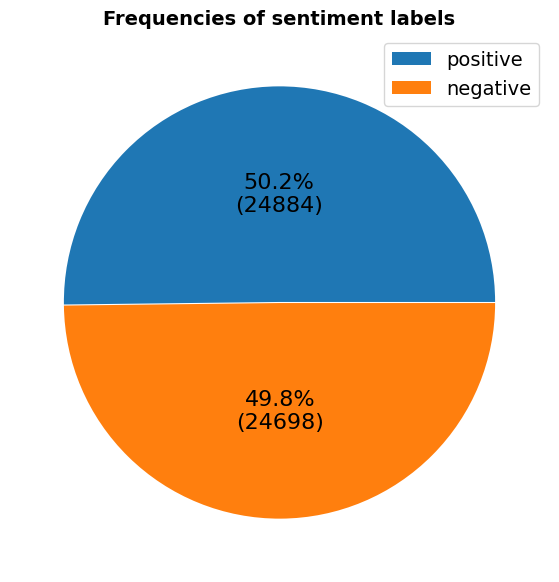

In [9]:
def func(pct, allvalues):
  absolute = int(pct / 100.* np.sum(allvalues)) ## tính số phần trăm số lượng của từng nhãn trong tổng data
  return "{:.1f}%\n({:d})".format(pct, absolute)

freg_pos = len(df[df['sentiment'] == 'positive'])
freg_neg = len(df[df['sentiment'] == 'negative'])
data = [freg_pos, freg_neg]
labels = ['positive', 'negative']

# Tạo biểu đồ hình tròn
fig, ax = plt.subplots(figsize=[11, 7])
plt.pie(
    x=data,
    autopct=lambda pct: func(pct, data),
    explode=[0.0025] * 2,
    pctdistance=0.5,
    colors=['#1f77b4', '#ff7f0e'],  # Sử dụng màu sắc cố định thay vì sns
    textprops={'fontsize': 16}
)

# Đặt tiêu đề cho biểu đồ
plt.title('Frequencies of sentiment labels', fontsize=14, fontweight='bold')

# Tạo chú giải cho biểu đồ
plt.legend(labels, loc="best", prop={'size': 14})

# Lưu biểu đồ dưới dạng hình ảnh
plt.savefig("PieChart.png")

# Hiển thị biểu đồ
plt.show()


## Thống kê độ dài của các mẫu trong mỗi class ##

In [10]:
words_len = df['review'].str.split().map(lambda x: len(x))
df_temp = df.copy()
df_temp['words length'] = words_len

In [11]:
df_temp[:10]



,review,sentiment,review_cleaned,words length
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod hook right ...,307
1,A wonderful little production. <br /><br />The...,positive,wonder littl product film techniqu unassum old...,162
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...,166
3,Basically there's a family where a little boy ...,negative,basic famili littl boy jake think zombi closet...,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...,230
5,"Probably my all-time favorite movie, a story o...",positive,probabl alltim favorit movi stori selfless sac...,119
6,I sure would like to see a resurrection of a u...,positive,sure would like see resurrect date seahunt ser...,150
7,"This show was an amazing, fresh & innovative i...",negative,show amaz fresh innov idea first air first yea...,174
8,Encouraged by the positive comments about this...,negative,encourag posit comment film look forward watch...,130
9,If you like original gut wrenching laughter yo...,positive,like origin gut wrench laughter like movi youn...,33


## Biểu đồ phân phối postive##

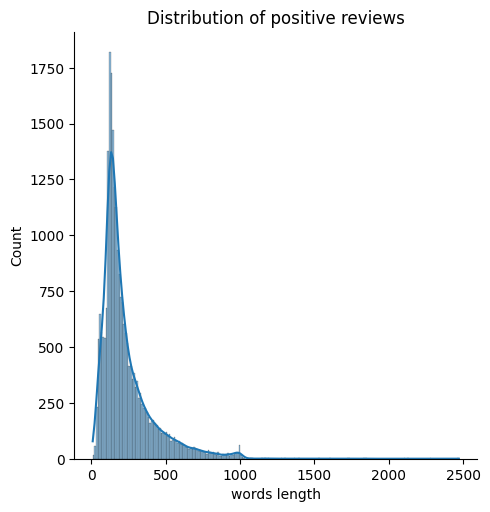

In [12]:
hist_positive = sns.displot(
    data = df_temp[df_temp['sentiment'] == 'positive'],
    x = 'words length',
    kde = True,
    color = '#1f77b4'
).set(title = 'Distribution of positive reviews')

plt.show()


## Biểu đồ phân phối Negative##

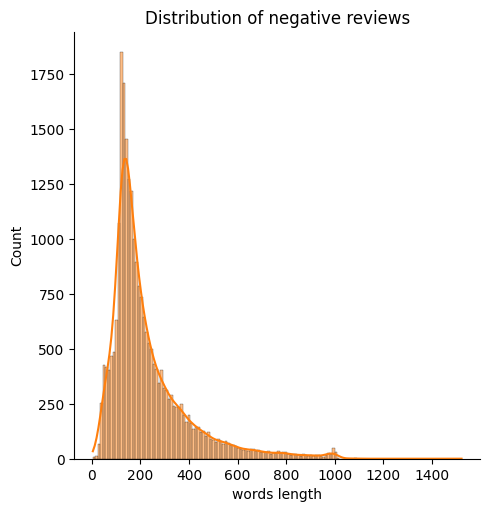

In [13]:
hist_negative = sns.displot(
    data = df_temp[df_temp['sentiment'] == 'negative'],
    x = 'words length',
    kde = True,
    color = '#ff7f0e'
).set(title = 'Distribution of negative reviews')

plt.show()

## Chia tập Train và Test ##

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer # TF-IDF

from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder()
y_data = label_encode.fit_transform(df['sentiment'])
x_train, x_test, y_train, y_test = train_test_split(df['review_cleaned'], y_data, test_size=0.2, random_state=42)



## Biểu diễn văn bản -> Vecto ( Sử dụng TF-IDF)

In [15]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectorizer.fit(x_train, y_train)
x_train_encoded = tfidf_vectorizer.transform(x_train)
x_test_encoded = tfidf_vectorizer.transform(x_test)

## Train Model và Đánh giá( Sử dụng DecisionTreeClassifier ) ##

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình Random Forest với giá trị random_state=42 để đảm bảo tái tạo kết quả
rf_classifier = RandomForestClassifier(random_state=42)

# Huấn luyện mô hình với dữ liệu huấn luyện
rf_classifier.fit(x_train_encoded, y_train)

# Dự đoán nhãn cho tập kiểm thử
y_pred = rf_classifier.predict(x_test_encoded)

# Tính toán độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)

# In ra độ chính xác
print(f"Accuracy: {accuracy}")


Accuracy: 0.844307754361198


## Accuracy using AdaBoost ##

In [17]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình AdaBoost
ada_classifier = AdaBoostClassifier(random_state=42)

# Huấn luyện mô hình với dữ liệu huấn luyện
ada_classifier.fit(x_train_encoded, y_train)

# Dự đoán nhãn cho tập kiểm thử
y_pred = ada_classifier.predict(x_test_encoded)

# Tính toán độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)

# In ra độ chính xác
print(f"Accuracy of AdaBoost: {accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy of AdaBoost: 0.7992336392054049


In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình Gradient Boosting
gb_classifier = GradientBoostingClassifier(random_state=42)

# Huấn luyện mô hình với dữ liệu huấn luyện
gb_classifier.fit(x_train_encoded, y_train)

# Dự đoán nhãn cho tập kiểm thử
y_pred = gb_classifier.predict(x_test_encoded)

# Tính toán độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)

# In ra độ chính xác
print(f"Accuracy of Gradient Boosting: {accuracy}")


Accuracy of Gradient Boosting: 0.8019562367651507


## Using XGBoost

In [19]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình XGBoost
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Huấn luyện mô hình với dữ liệu huấn luyện
xgb_classifier.fit(x_train_encoded, y_train)

# Dự đoán nhãn cho tập kiểm thử
y_pred = xgb_classifier.predict(x_test_encoded)

# Tính toán độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)

# In ra độ chính xác
print(f"Accuracy of XGBoost: {accuracy}")


Accuracy of XGBoost: 0.8441060804678834
